# Importing the data

In [50]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
df_resume=pd.read_csv('raw_data/Data_Set_CV_Cleaned_version test.csv')
df_resume.drop(['Unnamed: 0'],axis=1,inplace=True)
df_resume=df_resume.rename(columns={'New_Category':'Category','CV_cleaned':'Resume'})
df_resume.dropna(inplace=True)


In [52]:
df_resume['lenght']=df_resume['Resume'].apply(len)

In [53]:
df_resume['lenght'].mean()


4977.59805873569

<AxesSubplot: xlabel='lenght', ylabel='Count'>

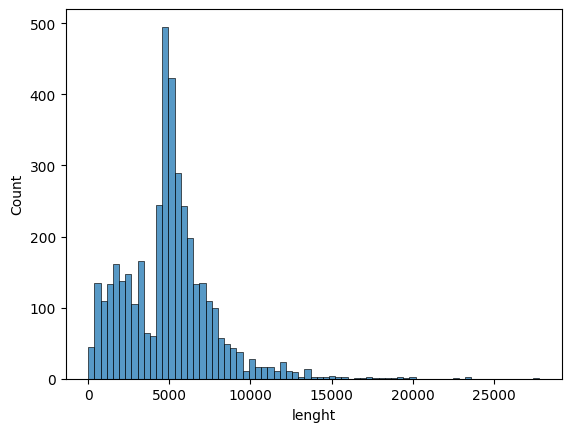

In [54]:
sns.histplot(df_resume['lenght'])

In [55]:
df_resume=df_resume.drop_duplicates()


In [56]:
df_resume_filtred=df_resume[df_resume['lenght']<10000]

In [57]:
df_resume_filtred.shape

(3071, 3)

In [59]:
df_resume_filtred['Category'].value_counts()

Engineering and Construction        353
Arts, Culture, and Entertainment    346
Sales and Commerce                  345
Finance and Accounting              342
Health and Life Sciences            256
Marketing and Communication         215
Administration and Management       204
Human Resources                     157
Transport and Logistics             143
Tourism and Hospitality             138
Law and Legal                       131
Education and Training              129
Personal and Community Services     127
Technology and IT                   114
Science and Research                 71
Name: Category, dtype: int64

# Dummy models

In [60]:
#display the score
resuls_dict = {'model': [], 'score': []}
results_df = pd.DataFrame(resuls_dict)

In [61]:
# Création d'un échantillon aléatoire de 20% du dataset complet
sample_df = df_resume_filtred.sample(frac=0.2, random_state=42)
full_df=df_resume_filtred

## DummyClassifier from sklearn

In [62]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Division en deux set d'entraînement et de test sur tout le dataset
X=full_df['Resume']
y=full_df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionnaire pour stocker les modèles avec différentes stratégies
dummy_models = {}
dummy_strategies = ['stratified', 'most_frequent', 'uniform', 'prior']


for strategy in dummy_strategies:
    dummy_model = DummyClassifier(strategy=strategy, random_state=42)
    dummy_models[strategy] = dummy_model

# Entraînez et évaluez les modèles
for strategy, model in dummy_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy for strategy '{strategy}': {accuracy:.2f}")
    new_line = {'model': f"DummyClassifier with '{strategy}' strategy" , 'score': round(accuracy,2)}
    results_df = results_df.append(new_line, ignore_index=True)

Accuracy for strategy 'stratified': 0.08
Accuracy for strategy 'most_frequent': 0.09
Accuracy for strategy 'uniform': 0.06
Accuracy for strategy 'prior': 0.09


/var/folders/p9/_030_tzn0cx_x11mkmfz6w800000gn/T/ipykernel_74075/2829911646.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_line, ignore_index=True)
/var/folders/p9/_030_tzn0cx_x11mkmfz6w800000gn/T/ipykernel_74075/2829911646.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_line, ignore_index=True)
/var/folders/p9/_030_tzn0cx_x11mkmfz6w800000gn/T/ipykernel_74075/2829911646.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_line, ignore_index=True)
/var/folders/p9/_030_tzn0cx_x11mkmfz6w800000gn/T/ipykernel_74075/2829911646.py:27: FutureWarning: The frame.append method is deprecated and will be removed from panda

## Logistic Regression Model TF-IDF 

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Division en deux set d'entraînement et de test sur tout le dataset
X=full_df['Resume']
y=full_df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'une représentation TF-IDF des textes
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entraînement
logistic_regression_model = LogisticRegression(max_iter=500)
logistic_regression_model.fit(X_train_tfidf, y_train)

# Predict
predictions = logistic_regression_model.predict(X_test_tfidf)

# evaluation
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

new_line = {'model': "LogisticRegression with TF-IDF" , 'score': round(accuracy,2)}
results_df = results_df.append(new_line, ignore_index=True)

Accuracy: 0.6357723577235772
Classification Report:
                                   precision    recall  f1-score   support

   Administration and Management       0.48      0.52      0.50        44
Arts, Culture, and Entertainment       0.55      0.67      0.60        70
          Education and Training       0.78      0.60      0.68        30
    Engineering and Construction       0.63      0.73      0.67        78
          Finance and Accounting       0.77      0.90      0.83        69
        Health and Life Sciences       0.53      0.63      0.57        43
                 Human Resources       0.90      0.82      0.86        34
                   Law and Legal       0.71      0.48      0.57        25
     Marketing and Communication       0.77      0.75      0.76        48
 Personal and Community Services       0.80      0.30      0.43        27
              Sales and Commerce       0.51      0.71      0.60        56
            Science and Research       0.67      0.12     

/var/folders/p9/_030_tzn0cx_x11mkmfz6w800000gn/T/ipykernel_74075/2292701346.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_line, ignore_index=True)


## Text Classification with TF-IDF and Random Forest Model

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Division en deux set d'entraînement et de test sur tout le dataset
X=full_df['Resume']
y=full_df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer une représentation TF-IDF des textes
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entraîner un modèle de forêt d'arbres décisionnels
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = random_forest_model.predict(X_test_tfidf)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
#print("Classification Report:\n", report)

new_line = {'model': "RandomForestClassifier with TF-IDF" , 'score': round(accuracy,2)}
results_df = results_df.append(new_line, ignore_index=True)


Accuracy: 0.5886178861788618


/var/folders/p9/_030_tzn0cx_x11mkmfz6w800000gn/T/ipykernel_74075/3273922763.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_line, ignore_index=True)


## Naive Baye Model


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Division en deux set d'entraînement et de test sur tout le dataset
X=full_df['Resume']
y=full_df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Créer le modèle Naive Bayes
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédire les étiquettes sur les données de test
y_pred = model.predict(X_test)

# Afficher les performances du modèle
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

new_line = {'model': "Naive Baye Model" ,'score': round(metrics.accuracy_score(y_test, y_pred),2)}
results_df = results_df.append(new_line, ignore_index=True)

Accuracy: 0.5772357723577236

Classification Report:
                                   precision    recall  f1-score   support

   Administration and Management       0.49      0.52      0.51        44
Arts, Culture, and Entertainment       0.51      0.43      0.47        70
          Education and Training       0.64      0.53      0.58        30
    Engineering and Construction       0.64      0.69      0.67        78
          Finance and Accounting       0.70      0.91      0.79        69
        Health and Life Sciences       0.52      0.70      0.59        43
                 Human Resources       0.96      0.74      0.83        34
                   Law and Legal       0.50      0.40      0.44        25
     Marketing and Communication       0.72      0.71      0.72        48
 Personal and Community Services       1.00      0.11      0.20        27
              Sales and Commerce       0.38      0.64      0.47        56
            Science and Research       0.50      0.12    

/var/folders/p9/_030_tzn0cx_x11mkmfz6w800000gn/T/ipykernel_74075/1945132640.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_line, ignore_index=True)


## Deep learning model

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Division en deux set d'entraînement et de test sur tout le dataset
X=full_df['Resume']
y=full_df['Category']

# X=sample_df['Resume']
# y=sample_df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to integers
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(y)

# Tokenizer to convert text into sequences of integers
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

#Padding to ensure all sequences have the same length
max_len = 5000

X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_seq, padding='post', maxlen=max_len)

# Create the model

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_len,mask_zero=True),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(len(y.unique()), activation='softmax') # verfifier si len(y.unique() corresponds bien au nombre de categories.
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
epochs=1000
model.fit(X_padded, y_labels, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])  # modifier le nombre d'epoch

# Evaluate the model on the entire dataset
test_loss, test_acc = model.evaluate(X_padded, y_labels)
print("Accuracy on the entire dataset:", test_acc)

new_line = {'model': "Neural Network model" , 'score': round(test_acc,2)}
results_df = results_df.append(new_line, ignore_index=True)


Epoch 1/1000
18/77 [======>.......................] - ETA: 4:54 - loss: 2.6866 - accuracy: 0.0694

## Pre Train model : BERT

In [30]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import legacy


In [22]:
# Charger le modèle BERT
# model_name = "bert-base-uncased"
model_name = "bert-large-uncased"

model = TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [26]:
#transforme les category en nombre
labels_dict = {}
for idx, label in enumerate(df_resume.Category.unique()):
    labels_dict[label] = idx

df_resume.Category = df_resume.Category.apply(func=lambda x: labels_dict[x])
df_resume['Resume'].fillna('', inplace=True)

sample_df = df_resume.sample(frac=0.1, random_state=42) #x% du dataset.
#Division des données en ensembles d'entraînement, de validation et de test
train_data, test_data = train_test_split(sample_df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)


In [27]:
#Tokenisation avec BERT
# Charger le tokenizer BERT
tokenizer = AutoTokenizer.from_pretrained(model_name)


# Tokeniser les textes d'entraînement, de validation et de test
max_length=100
train_tokens = tokenizer(list(train_data['Resume']), truncation=True, padding=True, max_length=max_length, return_tensors="tf")
val_tokens = tokenizer(list(val_data['Resume']), truncation=True, padding=True, max_length=max_length, return_tensors="tf")
test_tokens = tokenizer(list(test_data['Resume']), truncation=True, padding=True, max_length=max_length, return_tensors="tf")

# Extraire les input_ids et attention_masks
train_input_ids, train_attention_masks = train_tokens['input_ids'], train_tokens['attention_mask']
val_input_ids, val_attention_masks = val_tokens['input_ids'], val_tokens['attention_mask']
test_input_ids, test_attention_masks = test_tokens['input_ids'], test_tokens['attention_mask']


In [28]:
# Modifier la structure de votre modèle en utilisant le modèle fonctionnel
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

# Incorporer BERT dans votre modèle
bert_output = model({'input_ids': input_ids, 'attention_mask': attention_mask}).logits

# Ajouter la couche Dense pour la classification
#output = tf.keras.layers.Dense(units=len(df_resume['Category'].unique()), activation='softmax')(bert_output)
output = tf.keras.layers.Dense(units=len(df_resume['Category'].unique()), activation='softmax')(bert_output)

# Créer le modèle fonctionnel
classification_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Définir le learning rate initial et la taille du batch
initial_learning_rate = 1e-2
batch_size = 32

# Définir le plan d'apprentissage (learning schedule) avec une décroissance exponentielle
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=len(train_data) // batch_size, decay_rate=0.9, staircase=True
)


In [31]:
# Compiler le modèle avec l'optimiseur utilisant le plan d'apprentissage
classification_model.compile(
    # optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    optimizer = legacy.Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
# Définir l'arrêt précoce
early_stopping = EarlyStopping(
    monitor='val_loss',  # Surveiller la perte sur l'ensemble de validation
    patience=2,           # Nombre d'époques sans amélioration avant l'arrêt
    restore_best_weights=True  # Restaurer les meilleurs poids du modèle
)

In [33]:
history = classification_model.fit(
    {'input_ids': train_input_ids, 'attention_mask': train_attention_masks},
    train_data['Category'].values,
    epochs=1,
    batch_size=32,
    validation_data=({'input_ids': val_input_ids, 'attention_mask': val_attention_masks}, val_data['Category'].values)
)


8/8 [==============================] - 721s 89s/step - loss: 3.8521 - accuracy: 0.0781 - val_loss: 3.4138 - val_accuracy: 0.0615


In [20]:
# Évaluer le modèle
test_metrics = classification_model.evaluate(
    {'input_ids': test_input_ids, 'attention_mask': test_attention_masks},
    test_data['Category'].values
)

print("Test Accuracy:", test_metrics[1])

new_line = {'model': "BERT pretrained model" , 'score': round(test_metrics[1],2)}
results_df = results_df.append(new_line, ignore_index=True)


7/7 [==============================] - 25s 3s/step - loss: 2.7780 - accuracy: 0.0697
Test Accuracy: 0.06965173780918121


/var/folders/p9/_030_tzn0cx_x11mkmfz6w800000gn/T/ipykernel_74075/747190639.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(new_line, ignore_index=True)


# Results

In [21]:
results_df = results_df.sort_values(by='score', ascending=False)
results_df = results_df.reset_index(drop=True)
results_df

,model,score
0,RandomForestClassifier with TF-IDF,0.68
1,LogisticRegression with TF-IDF,0.60
2,Naive Baye Model,0.58
3,Neural Network model,0.21
4,DummyClassifier with 'stratified' strategy,0.12
5,DummyClassifier with 'stratified' strategy,0.12
6,DummyClassifier with 'most_frequent' strategy,0.09
7,DummyClassifier with 'prior' strategy,0.09
8,DummyClassifier with 'most_frequent' strategy,0.09
9,DummyClassifier with 'prior' strategy,0.09
